In [15]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [16]:
pip install pandas matplotlib seaborn streamlit


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [18]:
file_path = "matches.csv"
df = pd.read_csv(file_path)

In [30]:
print(df.columns)

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')


In [19]:
# Drop rows with missing winner information
df = df.dropna(subset=['winner'])

# Total wins per team
team_wins = df['winner'].value_counts()

In [20]:
team_wins = df['winner'].value_counts()

In [22]:
season_wins = df.groupby(['season', 'winner']).size().unstack(fill_value=0)


In [23]:
analysis_type = st.sidebar.selectbox(
    "Select Analysis Type",
    ["Total Wins", "Wins Per Season", "Win Margins", "Home vs Away"]
)


2025-03-18 06:41:11.291 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 06:41:11.292 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 06:41:11.293 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 06:41:11.294 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 06:41:11.295 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-03-18 06:41:11.296 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

<ipython-input-27-47407627b649>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wins.index, y=team_wins.values, palette="viridis")


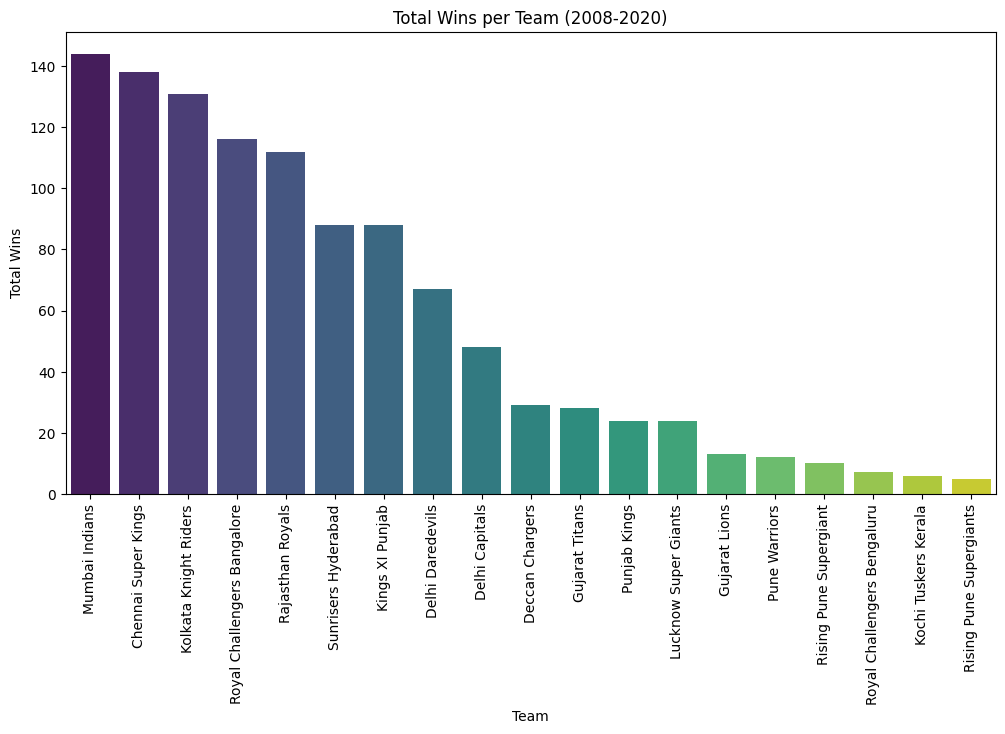

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x=team_wins.index, y=team_wins.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Team")
plt.ylabel("Total Wins")
plt.title("Total Wins per Team (2008-2020)")
plt.show()


<Figure size 1400x700 with 0 Axes>

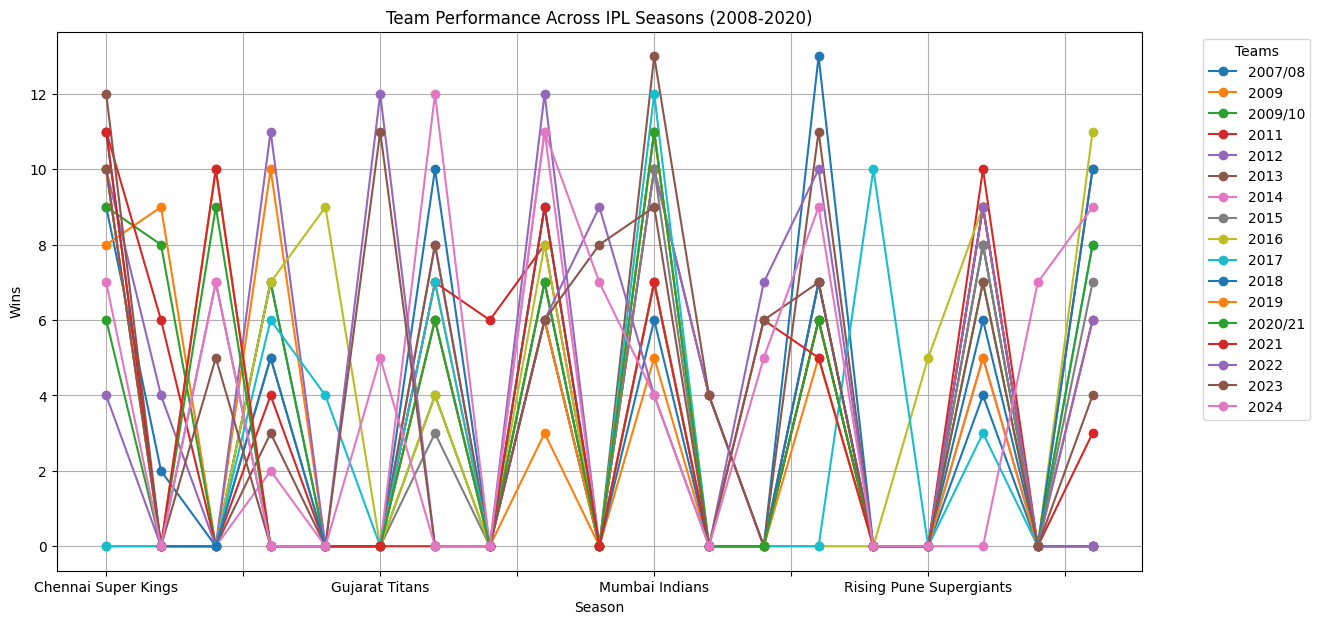

In [28]:
# Wins per team per season
season_wins = df.groupby(['season', 'winner']).size().unstack(fill_value=0)

# Visualization: Wins per Season
plt.figure(figsize=(14, 7))
season_wins.T.plot(kind='line', marker='o', figsize=(14,7))
plt.xlabel("Season")
plt.ylabel("Wins")
plt.title("Team Performance Across IPL Seasons (2008-2020)")
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

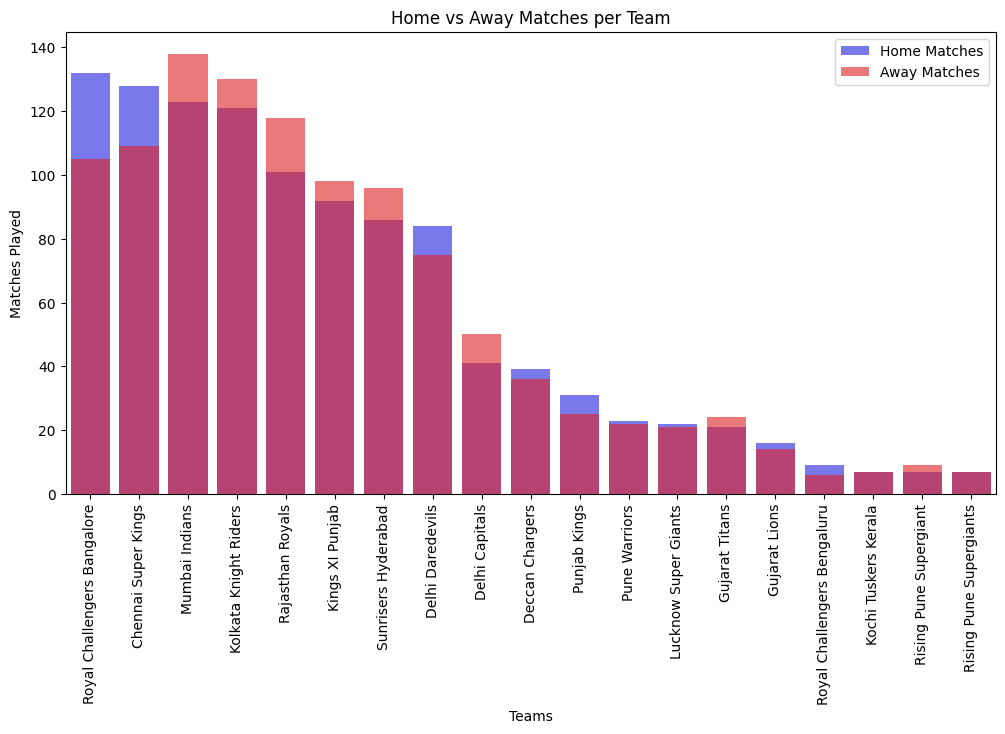

In [31]:
# Home vs Away Performance
home_teams = df['team1'].value_counts()
away_teams = df['team2'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=home_teams.index, y=home_teams.values, label="Home Matches", color='blue', alpha=0.6)
sns.barplot(x=away_teams.index, y=away_teams.values, label="Away Matches", color='red', alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Matches Played")
plt.title("Home vs Away Matches per Team")
plt.legend()
plt.show()